In [1]:
#Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes in a list.
coordinates = list(lat_lngs)

In [4]:
# import the citipy module.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities=[]
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

593

In [6]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for weather map API call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:

#Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city.
    city_url = url + "&q=" + city
        
    #log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")       
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | dubenskiy
City not found. Skipping...
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | yeppoon
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | abu samrah
Processing Record 9 of Set 1 | kabale
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | antalaha
Processing Record 13 of Set 1 | hunza
City not found. Skipping...
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | quatre cocos
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | kutum
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | kenai
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | geo

Processing Record 35 of Set 4 | puri
Processing Record 36 of Set 4 | norwich
Processing Record 37 of Set 4 | agadez
Processing Record 38 of Set 4 | ranot
Processing Record 39 of Set 4 | nantucket
Processing Record 40 of Set 4 | ryotsu
Processing Record 41 of Set 4 | eyl
Processing Record 42 of Set 4 | caxias
Processing Record 43 of Set 4 | college
Processing Record 44 of Set 4 | anito
Processing Record 45 of Set 4 | livramento
Processing Record 46 of Set 4 | tual
Processing Record 47 of Set 4 | atuona
Processing Record 48 of Set 4 | springbok
Processing Record 49 of Set 4 | varhaug
Processing Record 50 of Set 4 | afrikanda
Processing Record 1 of Set 5 | shingu
Processing Record 2 of Set 5 | vanavara
Processing Record 3 of Set 5 | aswan
Processing Record 4 of Set 5 | faranah
Processing Record 5 of Set 5 | kralendijk
Processing Record 6 of Set 5 | nasrullaganj
City not found. Skipping...
Processing Record 7 of Set 5 | mahebourg
Processing Record 8 of Set 5 | norman wells
Processing Recor

Processing Record 26 of Set 8 | lexington
Processing Record 27 of Set 8 | alghero
Processing Record 28 of Set 8 | mikonos
City not found. Skipping...
Processing Record 29 of Set 8 | chibuto
Processing Record 30 of Set 8 | namibe
Processing Record 31 of Set 8 | santa cruz del sur
Processing Record 32 of Set 8 | two rivers
Processing Record 33 of Set 8 | itapirapua
Processing Record 34 of Set 8 | ginda
Processing Record 35 of Set 8 | basco
Processing Record 36 of Set 8 | kenitra
Processing Record 37 of Set 8 | emilio carranza
Processing Record 38 of Set 8 | linhares
Processing Record 39 of Set 8 | pingzhuang
Processing Record 40 of Set 8 | timmins
Processing Record 41 of Set 8 | provideniya
Processing Record 42 of Set 8 | nhulunbuy
Processing Record 43 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 8 | hasaki
Processing Record 45 of Set 8 | tura
Processing Record 46 of Set 8 | santa fe
Processing Record 47 of Set 8 | fairbanks
Processing Record 48 of Set 8 |

Processing Record 16 of Set 12 | high prairie
Processing Record 17 of Set 12 | hami
Processing Record 18 of Set 12 | ugoofaaru
Processing Record 19 of Set 12 | yian
City not found. Skipping...
Processing Record 20 of Set 12 | atasu
Processing Record 21 of Set 12 | moerai
Processing Record 22 of Set 12 | eyrarbakki
Processing Record 23 of Set 12 | port macquarie
Processing Record 24 of Set 12 | buchanan
Processing Record 25 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 26 of Set 12 | kishtwar
Processing Record 27 of Set 12 | podyuga
Processing Record 28 of Set 12 | vasteras
Processing Record 29 of Set 12 | baherden
Processing Record 30 of Set 12 | kudahuvadhoo
Processing Record 31 of Set 12 | iskenderun
Processing Record 32 of Set 12 | chhindwara
Processing Record 33 of Set 12 | sassandra
Processing Record 34 of Set 12 | benguela
Processing Record 35 of Set 12 | srednekolymsk
Processing Record 36 of Set 12 | novyy urengoy
Processing Record 37 of Set 12 | ende
Proc

In [10]:
len(city_data)

545

In [11]:
#Convert the array of dictionaries to a panda dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,38.48,88,30,14.81,GL,2022-07-14 11:46:51
1,Rikitea,-23.1203,-134.9692,68.38,86,100,10.74,PF,2022-07-14 11:51:40
2,Sitka,57.0531,-135.3300,57.09,67,100,9.22,US,2022-07-14 11:51:40
3,Yeppoon,-23.1333,150.7333,51.58,62,0,8.46,AU,2022-07-14 11:51:41
4,Carnarvon,-24.8667,113.6333,69.24,77,8,10.98,AU,2022-07-14 11:51:41
5,Bethel,41.3712,-73.4140,73.53,84,0,3.44,US,2022-07-14 11:51:41
6,Abu Samrah,35.3029,37.1841,96.89,20,0,17.58,SY,2022-07-14 11:51:41
7,Kabale,-1.2486,29.9899,76.82,33,40,8.57,UG,2022-07-14 11:51:42
8,Castro,-24.7911,-50.0119,54.05,98,100,9.42,BR,2022-07-14 11:51:42
9,Busselton,-33.6500,115.3333,58.24,76,7,19.84,AU,2022-07-14 11:51:42


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-07-14 11:46:51,72.7868,-56.1549,38.48,88,30,14.81
1,Rikitea,PF,2022-07-14 11:51:40,-23.1203,-134.9692,68.38,86,100,10.74
2,Sitka,US,2022-07-14 11:51:40,57.0531,-135.3300,57.09,67,100,9.22
3,Yeppoon,AU,2022-07-14 11:51:41,-23.1333,150.7333,51.58,62,0,8.46
4,Carnarvon,AU,2022-07-14 11:51:41,-24.8667,113.6333,69.24,77,8,10.98
5,Bethel,US,2022-07-14 11:51:41,41.3712,-73.4140,73.53,84,0,3.44
6,Abu Samrah,SY,2022-07-14 11:51:41,35.3029,37.1841,96.89,20,0,17.58
7,Kabale,UG,2022-07-14 11:51:42,-1.2486,29.9899,76.82,33,40,8.57
8,Castro,BR,2022-07-14 11:51:42,-24.7911,-50.0119,54.05,98,100,9.42
9,Busselton,AU,2022-07-14 11:51:42,-33.6500,115.3333,58.24,76,7,19.84


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
#6.3.1
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1657840011.0258389

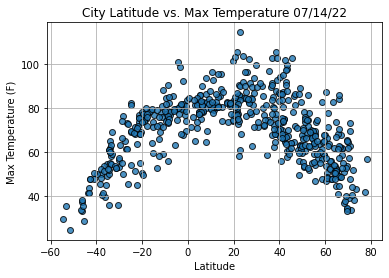

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

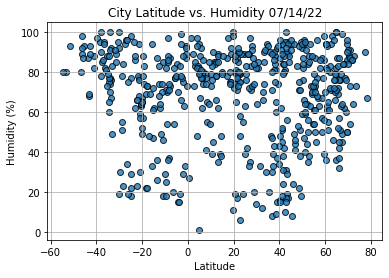

In [17]:
#6.3.2 :Latitude vs Humitdity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

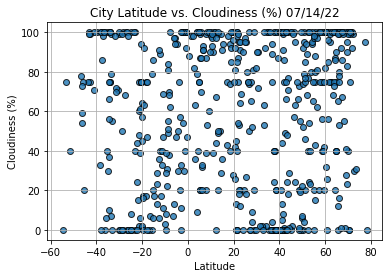

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

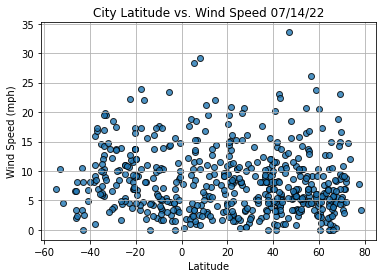

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [30]:
#Create a function to create perform linear regression on the weather data  and  
# plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y-values" from the slope and the intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = "y= " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color= "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:.3f}")

In [31]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2022-07-14 11:51:44
Lat                      -46.1927
Lng                      168.8643
Max Temp                    33.48
Humidity                       98
Cloudiness                     59
Wind Speed                   1.99
Name: 13, dtype: object

In [32]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
540     True
541     True
542    False
543     True
544     True
Name: Lat, Length: 545, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-07-14 11:46:51,72.7868,-56.1549,38.48,88,30,14.81
2,Sitka,US,2022-07-14 11:51:40,57.0531,-135.3300,57.09,67,100,9.22
5,Bethel,US,2022-07-14 11:51:41,41.3712,-73.4140,73.53,84,0,3.44
6,Abu Samrah,SY,2022-07-14 11:51:41,35.3029,37.1841,96.89,20,0,17.58
14,Severo-Kurilsk,RU,2022-07-14 11:51:44,50.6789,156.1250,53.49,96,95,6.91


In [35]:
# Create Northern and Southern Hemisphere dataframes.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

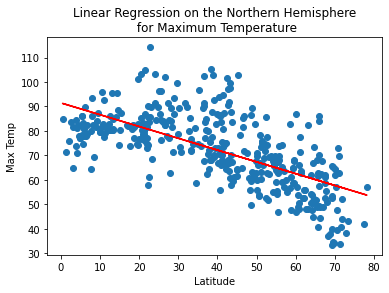

The r-value is -0.655


In [36]:
#linear regression on the northern hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Maximum Temperature", "Max Temp", (10,-20))

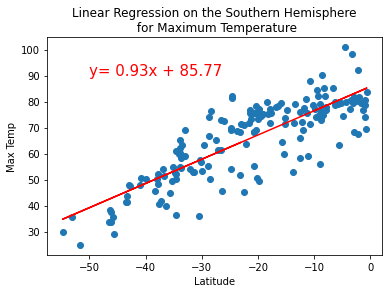

The r-value is 0.825


In [37]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Maximum Temperature", "Max Temp", (-50,90))

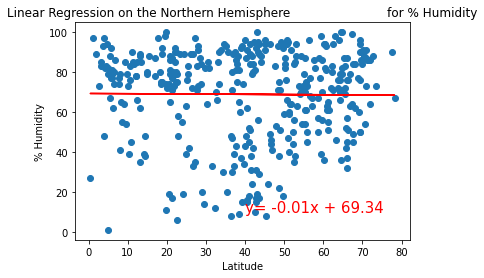

The r-value is -0.010


In [38]:
#6.4.3
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

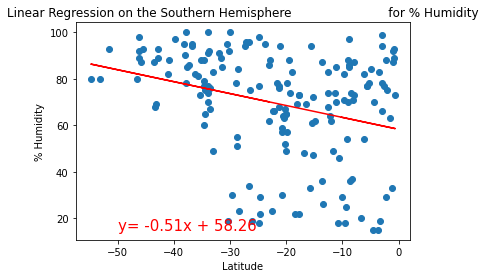

The r-value is -0.297


In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

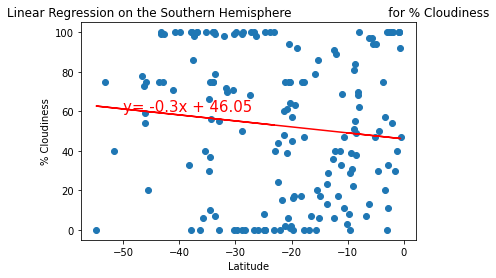

The r-value is -0.111


In [40]:
#6.4.4
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

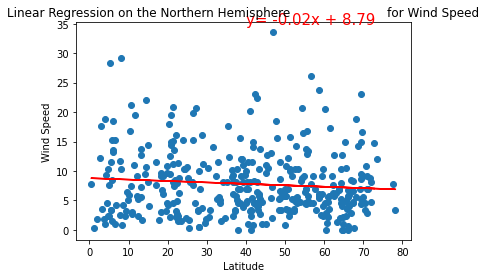

The r-value is -0.089


In [41]:
#6.4.5
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

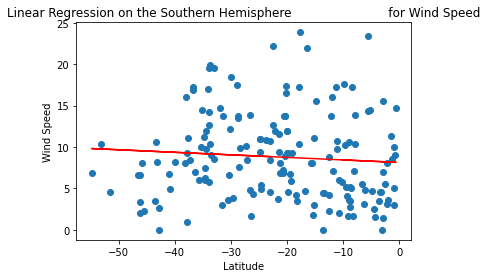

The r-value is -0.079


In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))